In [1]:
import numpy as np
import pandas as pd

In [2]:
def objective(x):
    # Rosenbrock’s saddle
    return sum(100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1))

def differential_evolution(func, bounds, pop_size, mutation_factor, crossover_prob, generations):
    dimensions = len(bounds)
    population = np.random.rand(pop_size, dimensions)
    
    for i in range(dimensions):
        population[:, i] = bounds[i][0] + population[:, i] * (bounds[i][1] - bounds[i][0])
        
    fitness = np.array([func(ind) for ind in population])
    
    for gen in range(generations):
        new_population = np.copy(population)
        
        for i in range(pop_size):
            # Mutation
            indices = list(range(pop_size))
            indices.remove(i)
            a, b, c = population[np.random.choice(indices, 3, replace=False)]
            mutant = np.clip(a + mutation_factor * (b - c), bounds[:, 0], bounds[:, 1])

            # Crossover
            cross_points = np.random.rand(dimensions) < crossover_prob
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
                
            trial = np.where(cross_points, mutant, population[i])
            f_trial = func(trial)
            
            if f_trial < fitness[i]:
                new_population[i] = trial
                fitness[i] = f_trial
        
        population = new_population
    
    best_idx = np.argmin(fitness)
    return population[best_idx], fitness[best_idx]

## Rosenbrock Function

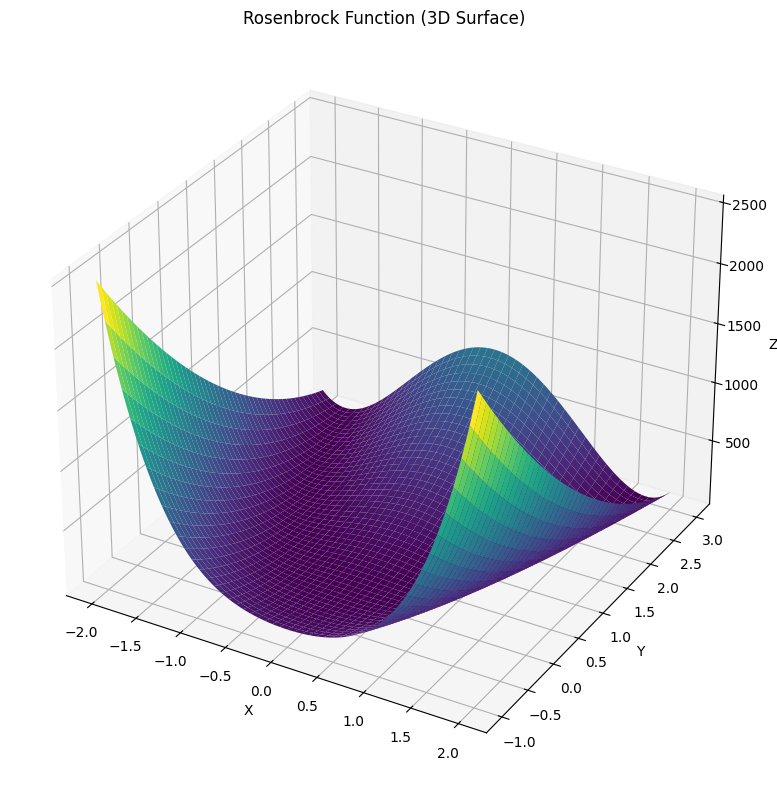

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock_3d(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 3, 1000)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_3d(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('Rosenbrock Function (3D Surface)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.tight_layout()
plt.show()

In [4]:
bounds = np.array([[-5, 5], [-5, 5]]) 
best_solution, best_fitness = differential_evolution(objective, bounds, pop_size = 20, mutation_factor = 0.2, crossover_prob = 0.1, generations = 500)

print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

Best solution: [1.04800668 1.09731399]
Best fitness: 0.0024054460848172772


In [5]:
best_solution, best_fitness = differential_evolution(objective, bounds, pop_size = 20, mutation_factor = 0.2, crossover_prob = 0.3, generations = 500)

print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

Best solution: [0.99999999 0.99999999]
Best fitness: 2.7290096408617572e-17


In [6]:
best_solution, best_fitness = differential_evolution(objective, bounds, pop_size = 20, mutation_factor = 0.2, crossover_prob = 0.5, generations = 500)

print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

Best solution: [1. 1.]
Best fitness: 1.7749370367472766e-30


In [7]:
best_solution, best_fitness = differential_evolution(objective, bounds, pop_size = 20, mutation_factor = 0.3, crossover_prob = 0.7, generations = 500)

print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

Best solution: [0.98748827 0.97507663]
Best fitness: 0.00015686213517357236


In [8]:
best_solution, best_fitness = differential_evolution(objective, bounds, pop_size = 20, mutation_factor = 0.2, crossover_prob = 0.7, generations = 500)

print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

Best solution: [0.85789437 0.73595213]
Best fitness: 0.020194104240418707


In [9]:
best_solution, best_fitness = differential_evolution(objective, bounds, pop_size = 20, mutation_factor = 0.3, crossover_prob = 0.8, generations = 500)

print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

Best solution: [1. 1.]
Best fitness: 0.0
